In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
dir0 = '../data/decision-making/data/'
dir1 = '../data/decision-making/data/data_behav'
dir2 = '../data/decision-making/data/data_ephys'
dir3 = '../data/memory/intracranial'
os.listdir(dir2)
# beh1_df = pd.read_csv(os.path.join(beh_dir,'gamble.data.s01.csv'))

['s01_ofc_hg_events.mat',
 's02_ofc_hg_events.mat',
 's03_ofc_hg_events.mat',
 's04_ofc_hg_events.mat',
 's05_ofc_hg_events.mat',
 's06_ofc_hg_events.mat',
 's07_ofc_hg_events.mat',
 's08_ofc_hg_events.mat',
 's09_ofc_hg_events.mat',
 's10_ofc_hg_events.mat']

# Datasets that match : s08, s09

In [2]:
s08_a = pd.read_csv(os.path.join(dir1,'gamble.data.s08.csv'))
s09_a = pd.read_csv(os.path.join(dir1,'gamble.data.s09.csv'))

In [3]:
from scipy.io import loadmat
def Parser(dir2, mat_file):
    df11 = loadmat(os.path.join(dir2, mat_file))
    eeg_data=pd.DataFrame()
    col1=[]
    col2=[]
    col3=[]
    col4=[]
    for i in range(len(df11['buttonpress_events_hg'])):
        col1.append(df11['buttonpress_events_hg'][i])
        col2.append(df11['buttonpress_window_events_hg'][i])
        col3.append(df11['game_events_hg'][i])
        col4.append(df11['game_window_events_hg'][i])
    eeg_data['buttonpress_events_hg']=col1
    eeg_data['buttonpress_window_events_hg']=col2
    eeg_data['game_events_hg']=col3
    eeg_data['game_window_events_hg']=col4
    return eeg_data

s08_b=Parser(dir2, 's08_ofc_hg_events.mat')
s09_b=Parser(dir2, 's09_ofc_hg_events.mat')

In [4]:
s08=s08_a.join(s08_b)
s09=s09_a.join(s09_b)

In [11]:
s08.head(10)
# s08.shape

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome,buttonpress_events_hg,buttonpress_window_events_hg,game_events_hg,game_window_events_hg
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win,"[[8.189263, -3.3722084, -2.2066743, -11.685912...","[[1.1976361, 0.7546783, -0.097674966, -8.84540...","[[-3.9830637, 2.054368, 0.38735, -5.911777, 3....","[[0.12032999, -0.46006632, 0.59750825, 0.04075..."
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon,"[[8.282565, 9.261214, 16.951536, 3.209131, 3.3...","[[3.2325447, 9.844124, 8.088182, -3.5797892, 0...","[[-2.6414268, 4.2130713, 0.4973471, -2.1641135...","[[0.12033214, -0.46006706, 0.597508, 0.0407513..."
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon,"[[-8.418733, -1.0391396, -5.6697006, 4.608375,...","[[-6.99666, -0.6379494, -9.8375635, -1.349263,...","[[3.977874, -1.4654589, 8.409906, 0.016839266,...","[[0.12032978, -0.46006572, 0.59750617, 0.04075..."
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win,"[[-6.5282855, 5.7625785, -1.6142912, -10.30803...","[[-7.390138, 2.4132915, -3.6685903, -8.66718, ...","[[3.0476134, -0.59436923, -1.0399958, 3.215400...","[[0.12032967, -0.46006623, 0.59750694, 0.04075..."
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost,"[[-2.001662, -9.123918, -2.734362, -16.656174,...","[[-4.0448694, -5.0452695, 1.6117659, -15.54377...","[[-1.0242233, -4.368639, 3.2822273, -12.464039...","[[0.12032869, -0.4600682, 0.5975085, 0.0407496..."
5,6,348.560,349.356,351.856,351.872,351.888,Safebet,Left,WouldHaveWon,"[[-4.235197, -3.9871476, -3.3274574, -6.441112...","[[-4.8929453, -1.1477013, 3.8534005, 0.3429633...","[[-13.066939, -1.2503425, -0.11194497, 7.25167...","[[0.12032693, -0.46006674, 0.5975082, 0.040753..."
6,7,352.903,353.700,355.731,355.747,355.778,Gamble,Right,Win,"[[-2.2351859, 5.57239, -17.110071, -5.3416123,...","[[-0.18973258, -4.3115044, -12.9906025, -4.291...","[[1.9455878, 3.626855, -12.939187, 0.32339594,...","[[0.12032839, -0.4600694, 0.5975077, 0.0407508..."
7,8,356.794,357.591,359.841,359.856,359.888,Safebet,Right,WouldHaveLost,"[[-2.2420375, -0.6013677, 0.94102794, 1.841662...","[[-4.064801, -2.8997207, -0.021782193, 0.91752...","[[1.1741319, 4.3107533, 5.2645435, 3.9868023, ...","[[0.12032967, -0.4600662, 0.5975072, 0.0407508..."
8,9,360.903,361.700,363.575,363.606,363.622,Safebet,Left,WouldHaveLost,"[[0.36635384, -7.2104917, 1.5738333, -1.450446...","[[-2.0669463, -4.032859, -1.2363816, -0.920808...","[[-6.3745804, -0.043890614, -4.9850144, 5.6875...","[[0.12033126, -0.46006706, 0.5975079, 0.040749..."
9,10,364.638,365.435,367.888,367.919,367.935,Gamble,Left,Win,"[[-7.077839, -9.419279, -3.324149, 1.4380174, ...","[[-8.883915, -6.2944603, 0.22072613, -5.623398...","[[10.514401, 2.6694343, -1.8924131, 4.5469575,...","[[0.12033136, -0.46006683, 0.5975069, 0.040750..."


In [12]:
s08['choice.class'].unique()

array(['Gamble', 'Safebet'], dtype=object)

In [19]:
s08['buttonpress_window_events_hg'][0].shape
s08['buttonpress_events_hg'][0].shape

(3001, 10)

In [13]:
# mask='Win'
# winset=s08[s08['outcome']==mask].reset_index()

In [14]:
# len(winset['game_events_hg'][1])

In [20]:
# Predict whether to gamble or not
## choice.class
test_dataset3=pd.DataFrame()
test_dataset3['choice.class']=s08['choice.class']
test_dataset3['buttonpress_events_hg_e1']=pd.Series(buttonpress_events_hg_e1)
test_dataset3['buttonpress_events_hg_e2']=pd.Series(buttonpress_events_hg_e2)
test_dataset3['buttonpress_events_hg_e3']=pd.Series(buttonpress_events_hg_e3)
test_dataset3['buttonpress_events_hg_e4']=pd.Series(buttonpress_events_hg_e4)
test_dataset3['buttonpress_events_hg_e5']=pd.Series(buttonpress_events_hg_e5)
test_dataset3['buttonpress_window_events_hg_e1']=pd.Series(buttonpress_window_events_hg_e1)
test_dataset3['buttonpress_window_events_hg_e2']=pd.Series(buttonpress_window_events_hg_e2)
test_dataset3['buttonpress_window_events_hg_e3']=pd.Series(buttonpress_window_events_hg_e3)
test_dataset3['buttonpress_window_events_hg_e4']=pd.Series(buttonpress_window_events_hg_e4)
test_dataset3['buttonpress_window_events_hg_e5']=pd.Series(buttonpress_window_events_hg_e5)
test_dataset3['game_events_hg_e1']=pd.Series(game_events_hg_e1)
test_dataset3['game_events_hg_e2']=pd.Series(game_events_hg_e2)
test_dataset3['game_events_hg_e3']=pd.Series(game_events_hg_e3)
test_dataset3['game_events_hg_e4']=pd.Series(game_events_hg_e4)
test_dataset3['game_events_hg_e5']=pd.Series(game_events_hg_e5)
test_dataset3['game_window_events_hg_e1']=pd.Series(game_window_events_hg_e1)
test_dataset3['game_window_events_hg_e2']=pd.Series(game_window_events_hg_e2)
test_dataset3['game_window_events_hg_e3']=pd.Series(game_window_events_hg_e3)
test_dataset3['game_window_events_hg_e4']=pd.Series(game_window_events_hg_e4)
test_dataset3['game_window_events_hg_e5']=pd.Series(game_window_events_hg_e5)

test_dataset3.head()

,choice.class,buttonpress_events_hg_e1,buttonpress_events_hg_e2,buttonpress_events_hg_e3,buttonpress_events_hg_e4,buttonpress_events_hg_e5,buttonpress_window_events_hg_e1,buttonpress_window_events_hg_e2,buttonpress_window_events_hg_e3,buttonpress_window_events_hg_e4,...,game_events_hg_e1,game_events_hg_e2,game_events_hg_e3,game_events_hg_e4,game_events_hg_e5,game_window_events_hg_e1,game_window_events_hg_e2,game_window_events_hg_e3,game_window_events_hg_e4,game_window_events_hg_e5
0,Gamble,8.189263,-3.372208,-2.206674,-11.685912,8.791708,1.197636,0.754678,-0.097675,-8.845409,...,-3.983064,2.054368,0.387350,-5.911777,3.101055,0.120330,-0.460066,0.597508,0.040750,0.438717
1,Safebet,8.309072,-3.722952,-2.248763,-11.782192,8.836982,2.751998,1.048592,0.550130,-10.123579,...,-3.487417,1.510658,0.330929,-4.983882,3.829085,1.611472,1.300701,4.480693,-3.161264,1.928560
2,Safebet,8.381103,-4.033373,-2.261157,-11.820498,8.827174,5.303413,2.672184,2.327480,-5.875658,...,-2.994162,0.907808,0.267598,-4.089704,4.500140,0.435881,1.998184,6.851138,-4.453824,3.471672
3,Gamble,8.403047,-4.302859,-2.244195,-11.799366,8.761988,10.379939,6.051144,2.189004,-3.083414,...,-2.513198,0.260519,0.201588,-3.241336,5.099395,0.606736,3.478153,7.985902,-9.270600,1.775681
4,Safebet,8.373334,-4.531190,-2.199324,-11.717930,8.642547,9.997090,5.064966,1.947521,-2.677791,...,-2.053795,-0.414611,0.137662,-2.449416,5.613289,1.741173,1.868642,5.980777,-12.378470,3.065140


In [24]:
gnb = GaussianNB()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    "buttonpress_events_hg_e1",
    "buttonpress_events_hg_e2",
    "buttonpress_events_hg_e3",
    "buttonpress_events_hg_e4",
    "buttonpress_events_hg_e5",
    "buttonpress_window_events_hg_e1",
    "buttonpress_window_events_hg_e2",
    "buttonpress_window_events_hg_e3",
    "buttonpress_window_events_hg_e4",
    "buttonpress_window_events_hg_e5",
#     "game_events_hg_e1",
#     "game_events_hg_e2",
#     "game_events_hg_e3",
#     "game_events_hg_e4",
#     "game_events_hg_e5",
#     "game_window_events_hg_e1",
#     "game_window_events_hg_e2",
#     "game_window_events_hg_e3",
#     "game_window_events_hg_e4",
#     "game_window_events_hg_e5"
]

# Train classifier
gnb.fit(
    test_dataset3[used_features].values,
    test_dataset3["choice.class"]
)
y_pred = gnb.predict(test_dataset3[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset3.shape[0],
          (test_dataset3["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset3["choice.class"] != y_pred).sum()/test_dataset3.shape[0])
))


Number of mislabeled points out of a total 200 points : 76, performance 62.00%


In [27]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

gnb = DecisionTreeClassifier()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    "buttonpress_events_hg_e1",
    "buttonpress_events_hg_e2",
    "buttonpress_events_hg_e3",
    "buttonpress_events_hg_e4",
    "buttonpress_events_hg_e5",
    "buttonpress_window_events_hg_e1",
    "buttonpress_window_events_hg_e2",
    "buttonpress_window_events_hg_e3",
    "buttonpress_window_events_hg_e4",
    "buttonpress_window_events_hg_e5",
#     "game_events_hg_e1",
#     "game_events_hg_e2",
#     "game_events_hg_e3",
#     "game_events_hg_e4",
#     "game_events_hg_e5",
#     "game_window_events_hg_e1",
#     "game_window_events_hg_e2",
#     "game_window_events_hg_e3",
#     "game_window_events_hg_e4",
#     "game_window_events_hg_e5"
]

# Train classifier
gnb.fit(
    test_dataset3[used_features].values,
    test_dataset3["choice.class"]
)
y_pred = gnb.predict(test_dataset3[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset3.shape[0],
          (test_dataset3["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset3["choice.class"] != y_pred).sum()/test_dataset3.shape[0])
))


Number of mislabeled points out of a total 200 points : 0, performance 100.00%


In [29]:
used_features =[
    "buttonpress_events_hg_e1",
    "buttonpress_events_hg_e2",
    "buttonpress_events_hg_e3",
    "buttonpress_events_hg_e4",
    "buttonpress_events_hg_e5",
    "buttonpress_window_events_hg_e1",
    "buttonpress_window_events_hg_e2",
    "buttonpress_window_events_hg_e3",
    "buttonpress_window_events_hg_e4",
    "buttonpress_window_events_hg_e5",
#     "game_events_hg_e1",
#     "game_events_hg_e2",
#     "game_events_hg_e3",
#     "game_events_hg_e4",
#     "game_events_hg_e5",
#     "game_window_events_hg_e1",
#     "game_window_events_hg_e2",
#     "game_window_events_hg_e3",
#     "game_window_events_hg_e4",
#     "game_window_events_hg_e5"
]

y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["outcome"] != y_pred).sum(),
          100*(1-(test_dataset2["outcome"] != y_pred).sum()/test_dataset2.shape[0])
))


Number of mislabeled points out of a total 200 points : 200, performance 00.00%


In [30]:
test_dataset3.to_csv("s08_electrodeparsed.csv")

# Fix of time series of s08, output: each column, with time series of each electrode as an array for each row

In [37]:
len(s08['buttonpress_events_hg'][0])
len(s08['buttonpress_events_hg'][1])

3001

In [32]:
s08

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome,buttonpress_events_hg,buttonpress_window_events_hg,game_events_hg,game_window_events_hg
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win,"[[8.189263, -3.3722084, -2.2066743, -11.685912...","[[1.1976361, 0.7546783, -0.097674966, -8.84540...","[[-3.9830637, 2.054368, 0.38735, -5.911777, 3....","[[0.12032999, -0.46006632, 0.59750825, 0.04075..."
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon,"[[8.282565, 9.261214, 16.951536, 3.209131, 3.3...","[[3.2325447, 9.844124, 8.088182, -3.5797892, 0...","[[-2.6414268, 4.2130713, 0.4973471, -2.1641135...","[[0.12033214, -0.46006706, 0.597508, 0.0407513..."
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon,"[[-8.418733, -1.0391396, -5.6697006, 4.608375,...","[[-6.99666, -0.6379494, -9.8375635, -1.349263,...","[[3.977874, -1.4654589, 8.409906, 0.016839266,...","[[0.12032978, -0.46006572, 0.59750617, 0.04075..."
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win,"[[-6.5282855, 5.7625785, -1.6142912, -10.30803...","[[-7.390138, 2.4132915, -3.6685903, -8.66718, ...","[[3.0476134, -0.59436923, -1.0399958, 3.215400...","[[0.12032967, -0.46006623, 0.59750694, 0.04075..."
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost,"[[-2.001662, -9.123918, -2.734362, -16.656174,...","[[-4.0448694, -5.0452695, 1.6117659, -15.54377...","[[-1.0242233, -4.368639, 3.2822273, -12.464039...","[[0.12032869, -0.4600682, 0.5975085, 0.0407496..."
5,6,348.560,349.356,351.856,351.872,351.888,Safebet,Left,WouldHaveWon,"[[-4.235197, -3.9871476, -3.3274574, -6.441112...","[[-4.8929453, -1.1477013, 3.8534005, 0.3429633...","[[-13.066939, -1.2503425, -0.11194497, 7.25167...","[[0.12032693, -0.46006674, 0.5975082, 0.040753..."
6,7,352.903,353.700,355.731,355.747,355.778,Gamble,Right,Win,"[[-2.2351859, 5.57239, -17.110071, -5.3416123,...","[[-0.18973258, -4.3115044, -12.9906025, -4.291...","[[1.9455878, 3.626855, -12.939187, 0.32339594,...","[[0.12032839, -0.4600694, 0.5975077, 0.0407508..."
7,8,356.794,357.591,359.841,359.856,359.888,Safebet,Right,WouldHaveLost,"[[-2.2420375, -0.6013677, 0.94102794, 1.841662...","[[-4.064801, -2.8997207, -0.021782193, 0.91752...","[[1.1741319, 4.3107533, 5.2645435, 3.9868023, ...","[[0.12032967, -0.4600662, 0.5975072, 0.0407508..."
8,9,360.903,361.700,363.575,363.606,363.622,Safebet,Left,WouldHaveLost,"[[0.36635384, -7.2104917, 1.5738333, -1.450446...","[[-2.0669463, -4.032859, -1.2363816, -0.920808...","[[-6.3745804, -0.043890614, -4.9850144, 5.6875...","[[0.12033126, -0.46006706, 0.5975079, 0.040749..."
9,10,364.638,365.435,367.888,367.919,367.935,Gamble,Left,Win,"[[-7.077839, -9.419279, -3.324149, 1.4380174, ...","[[-8.883915, -6.2944603, 0.22072613, -5.623398...","[[10.514401, 2.6694343, -1.8924131, 4.5469575,...","[[0.12033136, -0.46006683, 0.5975069, 0.040750..."


In [113]:
# len(s08['buttonpress_events_hg'][0][0])
# testlist=s08['buttonpress_events_hg'][0].T
# testlist[0]
s08['buttonpress_events_hg'][199].T[9]

array([0.26658106, 0.29936805, 0.3304328 , ..., 4.603331  , 4.702383  ,
       4.7553887 ], dtype=float32)

In [73]:
t1=pd.read_csv('s08.dat')

In [100]:
# t1['buttonpress_events_hg'][0]
# s08['buttonpress_events_hg'][0][0][0]

8.189263

In [76]:
# for Adi
# import json
# with open('s08_data.json', 'w') as outfile:
#     json.dump(s08, outfile)
s08.to_json('s08_data.json')

In [77]:
t1=pd.read_json('s08_data.json')

In [147]:
# trained on s08, test on s09

buttonpress_events_hg_e1=[]
buttonpress_events_hg_e2=[]
buttonpress_events_hg_e3=[]
buttonpress_events_hg_e4=[]
buttonpress_events_hg_e5=[]
buttonpress_events_hg_e6=[]
buttonpress_events_hg_e7=[]
buttonpress_events_hg_e8=[]
buttonpress_events_hg_e9=[]
buttonpress_events_hg_e10=[]
for i in range(len(s08['buttonpress_events_hg'])):
    buttonpress_events_hg_e1.append(s08['buttonpress_events_hg'][i].T[0])
    buttonpress_events_hg_e2.append(s08['buttonpress_events_hg'][i].T[1])
    buttonpress_events_hg_e3.append(s08['buttonpress_events_hg'][i].T[2])
    buttonpress_events_hg_e4.append(s08['buttonpress_events_hg'][i].T[3])
    buttonpress_events_hg_e5.append(s08['buttonpress_events_hg'][i].T[4])
    buttonpress_events_hg_e6.append(s08['buttonpress_events_hg'][i].T[5])
    buttonpress_events_hg_e7.append(s08['buttonpress_events_hg'][i].T[6])
    buttonpress_events_hg_e8.append(s08['buttonpress_events_hg'][i].T[7])
    buttonpress_events_hg_e9.append(s08['buttonpress_events_hg'][i].T[8])
    buttonpress_events_hg_e10.append(s08['buttonpress_events_hg'][i].T[9])

# buttonpress_window_events_hg_e1=[]
# buttonpress_window_events_hg_e2=[]
# buttonpress_window_events_hg_e3=[]
# buttonpress_window_events_hg_e4=[]
# buttonpress_window_events_hg_e5=[]
# buttonpress_window_events_hg_e6=[]
# buttonpress_window_events_hg_e7=[]
# buttonpress_window_events_hg_e8=[]
# buttonpress_window_events_hg_e9=[]
# buttonpress_window_events_hg_e10=[]
# for i in range(len(s08['buttonpress_window_events_hg'])):
#     for j in range(len(s08['buttonpress_window_events_hg'][i])):
#         buttonpress_window_events_hg_e1.append(s08['buttonpress_window_events_hg'][i][j][0])

        
# game_events_hg_e1=[]
# game_events_hg_e2=[]
# game_events_hg_e3=[]
# game_events_hg_e4=[]
# game_events_hg_e5=[]
# game_events_hg_e6=[]
# game_events_hg_e7=[]
# game_events_hg_e8=[]
# game_events_hg_e9=[]
# game_events_hg_e10=[]
# for i in range(len(s08['game_events_hg'])):
#     for j in range(len(s08['game_events_hg'][i])):
#         game_events_hg_e1.append(s09['game_events_hg'][i][j][0])

        
# game_window_events_hg_e1=[]
# game_window_events_hg_e2=[]
# game_window_events_hg_e3=[]
# game_window_events_hg_e4=[]
# game_window_events_hg_e5=[]
# game_window_events_hg_e6=[]
# game_window_events_hg_e7=[]
# game_window_events_hg_e8=[]
# game_window_events_hg_e9=[]
# game_window_events_hg_e10=[]
# for i in range(len(s08['game_window_events_hg'])):
#     for j in range(len(s08['game_window_events_hg'][i])):
#         game_window_events_hg_e1.append(s09['game_window_events_hg'][i][j][0])

        
test_dataset2=pd.DataFrame()
test_dataset2['outcome']=s08['outcome']
test_dataset2['choice.class']=s08['choice.class']
test_dataset2['buttonpress_events_hg_e1']=pd.Series(buttonpress_events_hg_e1)
test_dataset2['buttonpress_events_hg_e2']=pd.Series(buttonpress_events_hg_e2)
test_dataset2['buttonpress_events_hg_e3']=pd.Series(buttonpress_events_hg_e3)
test_dataset2['buttonpress_events_hg_e4']=pd.Series(buttonpress_events_hg_e4)
test_dataset2['buttonpress_events_hg_e5']=pd.Series(buttonpress_events_hg_e5)
test_dataset2['buttonpress_events_hg_e6']=pd.Series(buttonpress_events_hg_e6)
test_dataset2['buttonpress_events_hg_e7']=pd.Series(buttonpress_events_hg_e7)
test_dataset2['buttonpress_events_hg_e8']=pd.Series(buttonpress_events_hg_e8)
test_dataset2['buttonpress_events_hg_e9']=pd.Series(buttonpress_events_hg_e9)
test_dataset2['buttonpress_events_hg_e10']=pd.Series(buttonpress_events_hg_e10)
# test_dataset2['buttonpress_window_events_hg_e1']=pd.Series(buttonpress_window_events_hg_e1)
# test_dataset2['buttonpress_window_events_hg_e2']=pd.Series(buttonpress_window_events_hg_e2)
# test_dataset2['buttonpress_window_events_hg_e3']=pd.Series(buttonpress_window_events_hg_e3)
# test_dataset2['buttonpress_window_events_hg_e4']=pd.Series(buttonpress_window_events_hg_e4)
# test_dataset2['buttonpress_window_events_hg_e5']=pd.Series(buttonpress_window_events_hg_e5)
# test_dataset2['game_events_hg_e1']=pd.Series(game_events_hg_e1)
# test_dataset2['game_events_hg_e2']=pd.Series(game_events_hg_e2)
# test_dataset2['game_events_hg_e3']=pd.Series(game_events_hg_e3)
# test_dataset2['game_events_hg_e4']=pd.Series(game_events_hg_e4)
# test_dataset2['game_events_hg_e5']=pd.Series(game_events_hg_e5)
# test_dataset2['game_window_events_hg_e1']=pd.Series(game_window_events_hg_e1)
# test_dataset2['game_window_events_hg_e2']=pd.Series(game_window_events_hg_e2)
# test_dataset2['game_window_events_hg_e3']=pd.Series(game_window_events_hg_e3)
# test_dataset2['game_window_events_hg_e4']=pd.Series(game_window_events_hg_e4)
# test_dataset2['game_window_events_hg_e5']=pd.Series(game_window_events_hg_e5)

# meanlist=[]
# maxlist=[]
# minlist=[]
# stdlist=[]
# for k in range(len(test_dataset2['buttonpress_events_hg_e1'])):
#     itemlist.append(test_dataset2['buttonpress_events_hg_e1'][k].mean())
# #     print(test_dataset2['buttonpress_events_hg_e1'][j])




test_dataset2
# print(itemlist)

[0.6263828, 3.069692, -4.822321, -7.254536, -2.5511878, -3.7871156, 1.2395351, -1.1041523, -3.2153869, -9.532528, -0.37780425, -3.3669763, 0.2187108, -17.533613, -1.1029857, 6.149485, -1.4313065, 4.157361, -1.1747833, -1.1095381, -2.5271766, 3.2507417, 1.0242234, -0.85832644, 1.5223542, 0.92232066, -0.029684197, 3.7604542, -2.3411477, 3.1849942, 2.9792256, 0.8643762, -1.6051297, 0.28658912, -4.720948, 1.5805923, -1.9418112, -0.2752586, 1.5333121, 2.099656, -0.9347126, 1.2412853, 5.573214, 2.3704686, -2.765378, -1.5585238, -3.33396, 4.3563514, -5.1483746, -1.6253527, 0.36734444, 2.232985, -0.55209047, -2.3931644, 5.956434, -4.481069, 0.23758413, 2.034892, -1.6535953, 3.5152469, -0.82760566, 0.46565264, 2.941301, 0.5444542, -5.200813, 2.9204323, -3.2749846, -2.825065, 1.6451488, 1.6447194, -4.127917, -1.247698, 5.3375525, -2.8387067, 3.9740422, -2.5270898, -0.6586114, 1.0769613, 4.231337, -2.2255862, 2.4365053, -9.19603, 0.35030803, 2.4248118, 2.3072875, 2.1387105, -1.407375, -0.23518218

In [141]:
len(test_dataset2['buttonpress_events_hg_e1'])

200

In [119]:
gnb = GaussianNB()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    "buttonpress_events_hg_e1",
#     "buttonpress_events_hg_e2",
#     "buttonpress_events_hg_e3",
#     "buttonpress_events_hg_e4",
#     "buttonpress_events_hg_e5",
#      "buttonpress_events_hg_e6",
#     "buttonpress_events_hg_e7",
#     "buttonpress_events_hg_e8",
#     "buttonpress_events_hg_e9",
#     "buttonpress_events_hg_e10"
]

# Train classifier
gnb.fit(
    test_dataset2[used_features].values,
    test_dataset2["choice.class"]
)
y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset2["choice.class"] != y_pred).sum()/test_dataset2.shape[0])
))


ValueError: setting an array element with a sequence.

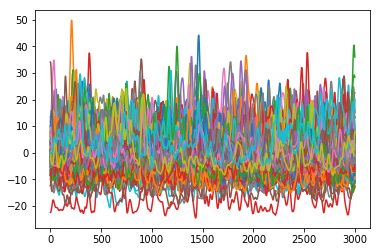

In [132]:
from scipy.io import loadmat
testnet = loadmat(os.path.join(dir2, 's08_ofc_hg_events.mat'))
# testnet
testnet['buttonpress_events_hg'][:,:,0].T
plt.plot(testnet['buttonpress_events_hg'][:,:,0].T)

# Feature engineering: convert each electrode's ts data into sub-variables of mean, max, min, std for classifier

In [153]:
# trained on s08, test on s09

buttonpress_events_hg_e1=[]
buttonpress_events_hg_e2=[]
buttonpress_events_hg_e3=[]
buttonpress_events_hg_e4=[]
buttonpress_events_hg_e5=[]
buttonpress_events_hg_e6=[]
buttonpress_events_hg_e7=[]
buttonpress_events_hg_e8=[]
buttonpress_events_hg_e9=[]
buttonpress_events_hg_e10=[]
for i in range(len(s08['buttonpress_events_hg'])):
    buttonpress_events_hg_e1.append(s08['buttonpress_events_hg'][i].T[0])
    buttonpress_events_hg_e2.append(s08['buttonpress_events_hg'][i].T[1])
    buttonpress_events_hg_e3.append(s08['buttonpress_events_hg'][i].T[2])
    buttonpress_events_hg_e4.append(s08['buttonpress_events_hg'][i].T[3])
    buttonpress_events_hg_e5.append(s08['buttonpress_events_hg'][i].T[4])
    buttonpress_events_hg_e6.append(s08['buttonpress_events_hg'][i].T[5])
    buttonpress_events_hg_e7.append(s08['buttonpress_events_hg'][i].T[6])
    buttonpress_events_hg_e8.append(s08['buttonpress_events_hg'][i].T[7])
    buttonpress_events_hg_e9.append(s08['buttonpress_events_hg'][i].T[8])
    buttonpress_events_hg_e10.append(s08['buttonpress_events_hg'][i].T[9])

     
test_dataset2=pd.DataFrame()
test_dataset2['outcome']=s08['outcome']
test_dataset2['choice.class']=s08['choice.class']
test_dataset2['buttonpress_events_hg_e1']=pd.Series(buttonpress_events_hg_e1)
test_dataset2['buttonpress_events_hg_e2']=pd.Series(buttonpress_events_hg_e2)
test_dataset2['buttonpress_events_hg_e3']=pd.Series(buttonpress_events_hg_e3)
test_dataset2['buttonpress_events_hg_e4']=pd.Series(buttonpress_events_hg_e4)
test_dataset2['buttonpress_events_hg_e5']=pd.Series(buttonpress_events_hg_e5)
test_dataset2['buttonpress_events_hg_e6']=pd.Series(buttonpress_events_hg_e6)
test_dataset2['buttonpress_events_hg_e7']=pd.Series(buttonpress_events_hg_e7)
test_dataset2['buttonpress_events_hg_e8']=pd.Series(buttonpress_events_hg_e8)
test_dataset2['buttonpress_events_hg_e9']=pd.Series(buttonpress_events_hg_e9)
test_dataset2['buttonpress_events_hg_e10']=pd.Series(buttonpress_events_hg_e10)


meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e1'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e1'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e1'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e1'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e1'][k].min())
test_dataset2['mean1']=meanlist
test_dataset2['max1']=maxlist
test_dataset2['min1']=minlist
test_dataset2['std1']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e2'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e2'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e2'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e2'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e2'][k].min())
test_dataset2['mean2']=meanlist
test_dataset2['max2']=maxlist
test_dataset2['min2']=minlist
test_dataset2['std2']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e3'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e3'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e3'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e3'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e3'][k].min())
test_dataset2['mean3']=meanlist
test_dataset2['max3']=maxlist
test_dataset2['min3']=minlist
test_dataset2['std3']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e4'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e4'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e4'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e4'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e4'][k].min())
test_dataset2['mean4']=meanlist
test_dataset2['max4']=maxlist
test_dataset2['min4']=minlist
test_dataset2['std4']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e5'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e5'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e5'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e5'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e5'][k].min())
test_dataset2['mean5']=meanlist
test_dataset2['max5']=maxlist
test_dataset2['min5']=minlist
test_dataset2['std5']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e6'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e6'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e6'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e6'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e6'][k].min())
test_dataset2['mean6']=meanlist
test_dataset2['max6']=maxlist
test_dataset2['min6']=minlist
test_dataset2['std6']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e7'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e7'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e7'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e7'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e7'][k].min())
test_dataset2['mean7']=meanlist
test_dataset2['max7']=maxlist
test_dataset2['min7']=minlist
test_dataset2['std7']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e8'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e8'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e8'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e8'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e8'][k].min())
test_dataset2['mean8']=meanlist
test_dataset2['max8']=maxlist
test_dataset2['min8']=minlist
test_dataset2['std8']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e9'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e9'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e9'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e9'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e9'][k].min())
test_dataset2['mean9']=meanlist
test_dataset2['max9']=maxlist
test_dataset2['min9']=minlist
test_dataset2['std9']=stdlist

meanlist=[]
maxlist=[]
minlist=[]
stdlist=[]
for k in range(len(test_dataset2['buttonpress_events_hg_e10'])):
    meanlist.append(test_dataset2['buttonpress_events_hg_e10'][k].mean())
    stdlist.append(test_dataset2['buttonpress_events_hg_e10'][k].std())
    maxlist.append(test_dataset2['buttonpress_events_hg_e10'][k].max())
    minlist.append(test_dataset2['buttonpress_events_hg_e10'][k].min())
test_dataset2['mean10']=meanlist
test_dataset2['max10']=maxlist
test_dataset2['min10']=minlist
test_dataset2['std10']=stdlist




test_dataset2

,outcome,choice.class,buttonpress_events_hg_e1,buttonpress_events_hg_e2,buttonpress_events_hg_e3,buttonpress_events_hg_e4,buttonpress_events_hg_e5,buttonpress_events_hg_e6,buttonpress_events_hg_e7,buttonpress_events_hg_e8,...,min8,std8,mean9,max9,min9,std9,mean10,max10,min10,std10
0,Win,Gamble,"[8.189263, 8.309072, 8.381103, 8.403047, 8.373...","[-3.3722084, -3.7229521, -4.033373, -4.3028593...","[-2.2066743, -2.248763, -2.2611573, -2.2441947...","[-11.685912, -11.782192, -11.820498, -11.79936...","[8.791708, 8.836982, 8.827174, 8.761988, 8.642...","[6.0717483, 5.19037, 4.3064265, 3.4334958, 2.5...","[4.670488, 4.606655, 4.5009747, 4.352489, 4.16...","[-5.42372, -5.406721, -5.436369, -5.5135384, -...",...,-9.137807,5.243423,4.206145,22.229761,-3.260044,4.777393,3.038012,51.455505,-5.664120,9.356254
1,WouldHaveWon,Safebet,"[8.282565, 8.261956, 8.179678, 8.041123, 7.852...","[9.261214, 9.516955, 9.796648, 10.101208, 10.4...","[16.951536, 16.579891, 16.211868, 15.849971, 1...","[3.209131, 3.1825314, 3.1381502, 3.07575, 2.99...","[3.3374472, 2.896859, 2.4257028, 1.9268948, 1....","[-1.0415049, -0.5812456, -0.08512243, 0.436419...","[4.7602363, 4.4796023, 4.2025647, 3.9316738, 3...","[9.476936, 9.124238, 8.7121725, 8.248504, 7.74...",...,-8.115989,6.422781,-0.318130,14.666759,-10.599746,5.374425,-3.175242,42.624706,-12.413002,7.462085
2,WouldHaveWon,Safebet,"[-8.418733, -8.290044, -8.152088, -8.001903, -...","[-1.0391396, -1.2970854, -1.5287384, -1.733119...","[-5.6697006, -6.121572, -6.5850368, -7.055017,...","[4.608375, 3.414463, 2.312132, 1.3129622, 0.42...","[-0.7133863, -1.0316257, -1.3046712, -1.530738...","[-3.7957811, -3.6234741, -3.450971, -3.2780168...","[24.20516, 22.763863, 21.255997, 19.706892, 18...","[2.189387, 1.9699713, 1.732534, 1.4797101, 1.2...",...,-7.811955,5.638484,-4.049120,17.730288,-14.547681,6.474900,-4.355474,54.131729,-12.335881,9.304393
3,Win,Gamble,"[-6.5282855, -6.4388146, -6.355846, -6.271425,...","[5.7625785, 5.617513, 5.466736, 5.314071, 5.16...","[-1.6142912, -1.739515, -1.8536291, -1.9593138...","[-10.308039, -10.538697, -10.800727, -11.08985...","[-9.092882, -9.057113, -9.012353, -8.960101, -...","[-4.9845104, -4.981648, -4.9616075, -4.9248476...","[-13.714795, -13.783482, -13.822464, -13.82927...","[6.4709535, 6.4901977, 6.4786296, 6.433216, 6....",...,-11.654126,7.421653,-1.483864,14.506656,-8.810668,3.853718,5.992268,86.106232,-6.432267,12.998384
4,WouldHaveLost,Safebet,"[-2.001662, -2.2148712, -2.396446, -2.5421271,...","[-9.123918, -8.921738, -8.707584, -8.48245, -8...","[-2.734362, -2.8861027, -3.0152075, -3.1217678...","[-16.656174, -16.66924, -16.667482, -16.65282,...","[-7.7107697, -7.8649845, -8.035155, -8.216321,...","[-0.1300718, -0.16057475, -0.19615634, -0.2306...","[-2.781308, -3.29787, -3.8457296, -4.412832, -...","[-12.347378, -12.534989, -12.744572, -12.97358...",...,-17.220961,6.291910,3.608674,33.081566,-7.031893,5.746507,-5.097452,37.560684,-13.873408,8.202618
5,WouldHaveWon,Safebet,"[-4.235197, -4.303354, -4.375778, -4.450328, -...","[-3.9871476, -3.8477497, -3.7055826, -3.562973...","[-3.3274574, -3.5035427, -3.6824968, -3.861491...","[-6.441112, -6.4072175, -6.356792, -6.299256, ...","[-12.793818, -12.411822, -12.028901, -11.64544...","[-5.472093, -5.6095614, -5.713726, -5.783358, ...","[-6.9031644, -6.961283, -6.9979057, -7.0168457...","[-5.7978005, -6.009445, -6.2144704, -6.408411,...",...,-9.387709,5.737416,-0.593742,26.072489,-10.396903,5.212375,0.613190,17.875088,-5.441868,4.239496
6,Win,Gamble,"[-2.2351859, -2.197482, -2.1266222, -2.026141,...","[5.57239, 5.673105, 5.7697883, 5.860166, 5.941...","[-17.110071, -17.031584, -16.920603, -16.78058...","[-5.3416123, -5.3398395, -5.3493404, -5.372571...","[-7.405439, -7.322291, -7.2180386, -7.096575, ...","[-9.949625, -9.8588295, -9.766649, -9.672753, ...","[-2.460698, -2.5574062, -2.6077335, -2.6169436...","[-2.8641694, -3.0101135, -3.150198, -3.2821913...",...,-9.320569,3.892108,0.348751,16.685926,-8.627658,4.710991,2.2

In [155]:
gnb = GaussianNB()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    'mean1',
    'max1',
    'min1',
    'std1',
    'mean2',
    'max2',
    'min2',
    'std2',
    'mean3',
    'max3',
    'min3',
    'std3',
    'mean4',
    'max4',
    'min4',
    'std4',
    'mean5',
    'max5',
    'min5',
    'std5',
    'mean6',
    'max6',
    'min6',
    'std6',
    'mean7',
    'max7',
    'min7',
    'std7',
    'mean8',
    'max8',
    'min8',
    'std8',
    'mean9',
    'max9',
    'min9',
    'std9',
    'mean10',
    'max10',
    'min10',
    'std10',
]

# Train classifier
gnb.fit(
    test_dataset2[used_features].values,
    test_dataset2["choice.class"]
)
y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset2["choice.class"] != y_pred).sum()/test_dataset2.shape[0])
))


Number of mislabeled points out of a total 200 points : 52, performance 74.00%


In [157]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = BernoulliNB()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    'mean1',
    'max1',
    'min1',
    'std1',
    'mean2',
    'max2',
    'min2',
    'std2',
    'mean3',
    'max3',
    'min3',
    'std3',
    'mean4',
    'max4',
    'min4',
    'std4',
    'mean5',
    'max5',
    'min5',
    'std5',
    'mean6',
    'max6',
    'min6',
    'std6',
    'mean7',
    'max7',
    'min7',
    'std7',
    'mean8',
    'max8',
    'min8',
    'std8',
    'mean9',
    'max9',
    'min9',
    'std9',
    'mean10',
    'max10',
    'min10',
    'std10',
]

# Train classifier
gnb.fit(
    test_dataset2[used_features].values,
    test_dataset2["choice.class"]
)
y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset2["choice.class"] != y_pred).sum()/test_dataset2.shape[0])
))


Number of mislabeled points out of a total 200 points : 78, performance 61.00%


In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gnb = GradientBoostingClassifier()
# test_dataset['buttonpress_events_hg_e1']
used_features =[
    'mean1',
    'max1',
    'min1',
    'std1',
    'mean2',
    'max2',
    'min2',
    'std2',
    'mean3',
    'max3',
    'min3',
    'std3',
    'mean4',
    'max4',
    'min4',
    'std4',
    'mean5',
    'max5',
    'min5',
    'std5',
    'mean6',
    'max6',
    'min6',
    'std6',
    'mean7',
    'max7',
    'min7',
    'std7',
    'mean8',
    'max8',
    'min8',
    'std8',
    'mean9',
    'max9',
    'min9',
    'std9',
    'mean10',
    'max10',
    'min10',
    'std10',
]

# Train classifier
gnb.fit(
    test_dataset2[used_features].values,
    test_dataset2["choice.class"]
)
y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset2["choice.class"] != y_pred).sum()/test_dataset2.shape[0])
))


Number of mislabeled points out of a total 200 points : 0, performance 100.00%


In [163]:
from sklearn.neural_network import MLPClassifier
gnb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
used_features =[
    'mean1',
    'max1',
    'min1',
    'std1',
    'mean2',
    'max2',
    'min2',
    'std2',
    'mean3',
    'max3',
    'min3',
    'std3',
    'mean4',
    'max4',
    'min4',
    'std4',
    'mean5',
    'max5',
    'min5',
    'std5',
    'mean6',
    'max6',
    'min6',
    'std6',
    'mean7',
    'max7',
    'min7',
    'std7',
    'mean8',
    'max8',
    'min8',
    'std8',
    'mean9',
    'max9',
    'min9',
    'std9',
    'mean10',
    'max10',
    'min10',
    'std10',
]

# Train classifier
gnb.fit(
    test_dataset2[used_features].values,
    test_dataset2["choice.class"]
)
y_pred = gnb.predict(test_dataset2[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test_dataset2.shape[0],
          (test_dataset2["choice.class"] != y_pred).sum(),
          100*(1-(test_dataset2["choice.class"] != y_pred).sum()/test_dataset2.shape[0])
))


Number of mislabeled points out of a total 200 points : 100, performance 50.00%


In [165]:
from scipy.io import loadmat
testnet = loadmat(os.path.join(dir0, 'bad_trials_OFC.mat'))

In [166]:
testnet

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 27 15:27:57 2018',
 '__version__': '1.0',
 '__globals__': [],
 'bad_trials_OFC': array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}